In [67]:
#Loading the packages into python
#These are the links that I am using as reference
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis
#https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd
#https://www.youtube.com/watch?v=S51bTyIwxFs
#https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598
#The Steps are as follows:
#1 Standardize the range of continuous initial variables so that each of them contributes equally to the analysis. This is done if there are are wide differences between the ranges between the ranges of the initial variables, the variables with the bigger ranges will be dom over the small ranges (sub) (i.e. var w/ range of 0 to 100 will dom over a var w/ range of 0 to 10).
#2 Compute the covariance matrix of the features from the dataset and how variables of input data set are varying from the mean w/ respect to each other (aka is there a relationship between them). This is done because some variables are very correlated so they have redundant info, so this will get rid of them. If positive covariance, then two variables will move together. If negative covariance, then variables would move inverse together. 
#3 Perform eigendecompositon on the covariance matrix.
#3a The Principal components are new variables which are constructed as linear combinations or mixtures of the initial variables, but are uncorrelated and most of the information within the initial variables are jammed in the first components.
#3b This organizes information to reduce dimensionality w/o losing much info and throws away components w/ low information and considers the remaining components as the new variables. 
#3c These are less meaningful since they are constructed as linear combos of the initial variable
#4 Order the eigenvectors in decreasing order based on the magnitude of their corresponding eigenvalues.
#5 Determine k, the number of top principal components to select.
#6 Construct the projection matrix from the chosen number of top principal components.
#7 Compute the new k-dimensional feature space.
#7a This is done by roatting the axis to fit the XY axis so all points fit along x-ish

In [68]:
#https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
#I am using this tutorial because I am about to flip a table like Tre Guidice

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
%matplotlib inline

In [71]:
dataset=pd.read_csv('AllData.csv') #I am importing my data file
dataset.head() #I want to see what the hell I am working with

Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  Var21  \
0     7     7     7     1     1     1     1     1     3      5  ...      4   
1     6     6     5     6     5     6     1     1     2      5  ...      3   
2     7     7     7     6     2     1     1     1     4      5  ...      5   
3     7     7     5     2     3     1     2     3     2      6  ...      5   
4     7     7     7     4     4     4     5     3     3      5  ...      3   

   Var22  Var23  Var24  Var25  Var26  Var27  Var28  ChatbotFamilarity  Group  
0      4      2      7      7      7      7      5                  1      1  
1      2      5      7      5      5      7      6                  1      1  
2      5      5      7      5      7      7      6                  1      1  
3      7      5      7      6      6      5      6                  1      1  
4      6      6      5      6      4      6      6                  1      1  

[5 rows x 30 columns]

In [72]:
dataset.describe() #This shows the summary statistics and stuff

Var1        Var2        Var3        Var4        Var5        Var6  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     6.191336    6.241877    6.205776    4.180505    3.967509    3.512635   
std      1.130697    1.130593    1.124933    1.751785    1.782267    1.737487   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      6.000000    6.000000    6.000000    3.000000    3.000000    2.000000   
50%      7.000000    7.000000    7.000000    4.000000    4.000000    4.000000   
75%      7.000000    7.000000    7.000000    6.000000    5.000000    5.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

             Var7       Var8        Var9       Var10  ...       Var21  \
count  277.000000  277.00000  277.000000  277.000000  ...  277.000000   
mean     2.707581    2.98917    3.805054    5.241877  ...    3.794224   
std      1.361098    1.56382    1.762608    1.054312  ...    1.727097   
min      1.000000    1.00000    1.000000    1.000000  ...    1.000000   
25%      1.000000    2.00000    3.000000    5.000000  ...    2.000000   
50%      3.000000    3.00000    4.000000    5.000000  ...    4.000000   
75%      3.000000    3.00000    5.000000    6.000000  ...    5.000000   
max      7.000000    7.00000    7.000000    7.000000  ...    7.000000   

            Var22       Var23       Var24       Var25       Var26       Var27  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     3.935018    3.826715    5.624549    5.411552    5.043321    5.490975   
std      1.720329    1.740067    0.979783    1.016322    1.307005    1.078827   
min      1.000000    1.000000    2.000000    2.000000    1.000000    1.000000   
25%      3.000000    2.000000    5.000000    5.000000    4.000000    5.000000   
50%      4.000000    4.000000    5.000000    5.000000    5.000000    6.000000   
75%      5.000000    5.000000    7.000000    6.000000    6.000000    6.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

            Var28  ChatbotFamilarity       Group  
count  277.000000         277.000000  277.000000  
mean     4.732852           1.050542    3.483755  
std      1.534897           0.219456    1.716477  
min      1.000000           1.000000    1.000000  
25%      4.000000           1.000000    2.000000  
50%      5.000000           1.000000    3.000000  
75%      6.000000           1.000000    5.000000  
max      7.000000           2.000000    6.000000  

[8 rows x 30 columns]

In [73]:
dataset.corr() #This shows the correlation between all variables

Var1      Var2      Var3      Var4      Var5      Var6  \
Var1               1.000000  0.913141  0.772214 -0.052255 -0.076013  0.023663   
Var2               0.913141  1.000000  0.761230 -0.056883 -0.060817 -0.000639   
Var3               0.772214  0.761230  1.000000  0.060142  0.017804  0.075594   
Var4              -0.052255 -0.056883  0.060142  1.000000  0.815381  0.651581   
Var5              -0.076013 -0.060817  0.017804  0.815381  1.000000  0.757727   
Var6               0.023663 -0.000639  0.075594  0.651581  0.757727  1.000000   
Var7              -0.375510 -0.403577 -0.320240  0.052609  0.093152  0.042168   
Var8              -0.461915 -0.463696 -0.315903  0.154136  0.170169  0.100727   
Var9              -0.304817 -0.288974 -0.188007  0.135821  0.119079  0.058778   
Var10              0.310559  0.315492  0.339743  0.048859  0.021551  0.001292   
Var11              0.229660  0.230915  0.315704  0.035728 -0.023219 -0.014812   
Var12              0.377310  0.350020  0.342242 -0.067319 -0.094911  0.034848   
Var13              0.356458  0.382582  0.318043 -0.036344 -0.071638 -0.029448   
Var14             -0.220456 -0.138081 -0.072951  0.077131  0.114746  0.038279   
Var15             -0.171177 -0.158817 -0.076606  0.187363  0.153764  0.140112   
Var16             -0.222689 -0.157128 -0.120617  0.057606  0.113589  0.043340   
Var17             -0.169873 -0.159653 -0.073276  0.129212  0.122451  0.073620   
Var18              0.129818  0.162888  0.121150 -0.012461 -0.085769 -0.045919   
Var19              0.106715  0.113550  0.120589  0.005556 -0.004088 -0.037919   
Var20              0.175613  0.213576  0.193952 -0.023510 -0.002235 -0.002985   
Var21              0.239167  0.214846  0.193441 -0.024803  0.008414  0.017170   
Var22              0.166604  0.188805  0.167944  0.017131  0.083209  0.060883   
Var23              0.160552  0.148460  0.147850  0.098257  0.105661  0.070234   
Var24              0.091244  0.069195  0.080212 -0.038477 -0.009086  0.000668   
Var25             -0.040396 -0.045955  0.071436  0.006965  0.033412 -0.017318   
Var26             -0.035050 -0.034088  0.006236  0.001320  0.048824  0.050814   
Var27              0.005876 -0.008601  0.023927 -0.058567 -0.057626 -0.007187   
Var28              0.050436  0.068689  0.046642 -0.025121  0.014034 -0.034053   
ChatbotFamilarity -0.024512  0.008962  0.016425  0.136401  0.059794  0.121847   
Group             -0.161741 -0.151996 -0.017965  0.117860  0.174518  0.118216   

                       Var7      Var8      Var9     Var10  ...     Var21  \
Var1              -0.375510 -0.461915 -0.304817  0.310559  ...  0.239167   
Var2              -0.403577 -0.463696 -0.288974  0.315492  ...  0.214846   
Var3              -0.320240 -0.315903 -0.188007  0.339743  ...  0.193441   
Var4               0.052609  0.154136  0.135821  0.048859  ... -0.024803   
Var5               0.093152  0.170169  0.119079  0.021551  ...  0.008414   
Var6               0.042168  0.100727  0.058778  0.001292  ...  0.017170   
Var7               1.000000  0.558536  0.386938 -0.276237  ... -0.001029   
Var8               0.558536  1.000000  0.482954 -0.330233  ... -0.039731   
Var9               0.386938  0.482954  1.000000 -0.169504  ...  0.010579   
Var10             -0.276237 -0.330233 -0.169504  1.000000  ...  0.111004   
Var11             -0.321284 -0.263074 -0.072074  0.515086  ...  0.073568   
Var12             -0.294679 -0.391489 -0.241279  0.437233  ...  0.047140   
Var13             -0.448117 -0.389073 -0.235354  0.576833  ...  0.083626   
Var14              0.114649  0.061544  0.107645 -0.055570  ... -0.043601   
Var15              0.091397  0.118911  0.186767 -0.077835  ... -0.099382   
Var16              0.170869  0.199558  0.162997 -0.055145  ... -0.076435   
Var17              0.183372  0.159990  0.077404 -0.055356  ... -0.064356   
Var18             -0.165355 -0.125879 -0.127848  0.251676  ...  0.013059   
Var19             -0.119918 -0.098687 -0.147913  0.070310  ...  0.0

In [74]:
df_centered = dataset.loc[:, ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]]
for col in df_centered.columns:
    df_centered[col] -= df_centered[col].mean()

# Take a look because I think I'll make it nice... this took a lot of typing for all of the variables that we are analyzing
df_centered.head()

Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.808664  0.758123  0.794224 -3.180505 -2.967509 -2.512635 -1.707581   
1 -0.191336 -0.241877 -1.205776  1.819495  1.032491  2.487365 -1.707581   
2  0.808664  0.758123  0.794224  1.819495 -1.967509 -2.512635 -1.707581   
3  0.808664  0.758123 -1.205776 -2.180505 -0.967509 -2.512635 -0.707581   
4  0.808664  0.758123  0.794224 -0.180505  0.032491  0.487365  2.292419   

      Var8      Var9     Var10  ...     Var19     Var20     Var21     Var22  \
0 -1.98917 -0.805054 -0.241877  ... -0.368231  0.368231  0.205776  0.064982   
1 -1.98917 -1.805054 -0.241877  ... -0.368231  0.368231 -0.794224 -1.935018   
2 -1.98917  0.194946 -0.241877  ...  0.631769  0.368231  1.205776  1.064982   
3  0.01083 -1.805054  0.758123  ...  1.631769  0.368231  1.205776  3.064982   
4  0.01083 -0.805054 -0.241877  ... -0.368231 -0.631769 -0.794224  2.064982   

      Var23     Var24     Var25     Var26     Var27     Var28  
0 -1.826715  1.375451  1.588448  1.956679  1.509025  0.267148  
1  1.173285  1.375451 -0.411552 -0.043321  1.509025  1.267148  
2  1.173285  1.375451 -0.411552  1.956679  1.509025  1.267148  
3  1.173285  1.375451  0.588448  0.956679 -0.490975  1.267148  
4  2.173285 -0.624549  0.588448 -1.043321  0.509025  1.267148  

[5 rows x 28 columns]

In [75]:
cov_mat = np.cov(df_centered.transpose())
print('Covariance matrix \n', cov_mat) #Jesus takew the wheel

Covariance matrix 
 [[ 1.27847538e+00  1.16732067e+00  9.82224141e-01 -1.03502851e-01
  -1.53181081e-01  4.64866845e-02 -5.77905091e-01 -8.16760843e-01
  -6.07492283e-01  3.70219223e-01  3.33647256e-01  6.39617015e-01
   4.73970596e-01 -4.07471355e-01 -3.23680218e-01 -3.81690472e-01
  -3.01980328e-01  1.50669701e-01  1.61173024e-01  2.37377701e-01
   4.67051222e-01  3.24072621e-01  3.15884477e-01  1.01083032e-01
  -4.64212839e-02 -5.17972061e-02  7.16789620e-03  8.75320463e-02]
 [ 1.16732067e+00  1.27823994e+00  9.68163030e-01 -1.12658923e-01
  -1.22547481e-01 -1.25568984e-03 -6.21043269e-01 -8.19834668e-01
  -5.75864595e-01  3.76066028e-01  3.35439230e-01  5.93300371e-01
   5.08659028e-01 -2.55192801e-01 -3.00279914e-01 -2.69293151e-01
  -2.83785905e-01  1.89033642e-01  1.71480144e-01  2.88664783e-01
   4.19518129e-01  3.67223879e-01  2.92065610e-01  7.66494009e-02
  -5.28043740e-02 -5.03714749e-02 -1.04902422e-02  1.19198975e-01]
 [ 9.82224141e-01  9.68163030e-01  1.26547376e+00  1.1

In [76]:
#I MADE IT NICE! I CALCULATED THE COVARIANCE MATRIX! FINALLY... 
#Now it is time to calculate the igensystem

In [77]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals) #Please let this work... but thius is
#what I am doing
#3a The Principal components are new variables which are constructed as linear
#combinations or mixtures of the initial variables, but are uncorrelated and 
#most of the information within the initial variables are jammed in the first 
#components.
#3b This organizes information to reduce dimensionality w/o losing much info 
#and throws away components w/ low information and considers the remaining 
#components as the new variables. 
#3c These are less meaningful since they are constructed as linear combos of 
#the initial variable


Eigenvectors
 [[-2.19384707e-01 -1.13904570e-01 -7.03426152e-02 -9.30383422e-02
   3.13039129e-02  7.54534143e-02  2.05237054e-01 -2.05487874e-01
   3.82071106e-01  1.70715890e-02 -7.21077955e-01  1.09563310e-01
  -3.49853972e-01  7.43882522e-02 -7.33907760e-05  1.13275431e-01
   2.23311427e-02 -6.09705688e-02 -7.19531684e-03  2.74956198e-02
  -2.60391207e-02  8.26492277e-03  5.72181081e-02  3.49760058e-02
  -3.60389753e-02 -4.60355347e-02 -3.95405144e-02 -5.67335542e-03]
 [-2.12349922e-01 -1.12431428e-01 -6.74645910e-02 -1.20864474e-01
   2.61467093e-02  6.27910364e-02  1.95099872e-01 -2.11965763e-01
   3.82937712e-01 -8.13312074e-03  6.80041716e-01  3.52416197e-02
  -3.84970406e-01  3.41937256e-02 -3.92632601e-02  1.79399001e-01
   1.16918113e-02 -1.04828668e-01 -7.11401867e-02  9.24669631e-02
   2.80516615e-02 -3.69653299e-02  3.04128954e-02  2.78243451e-02
  -1.68137238e-02 -6.63502733e-02 -8.60471407e-02  3.61324414e-02]
 [-1.63910905e-01 -1.35269585e-01 -7.44244873e-02 -1.2176324

In [78]:
#5 Determine k, the number of top principal components to select.

In [79]:
print("""
PCA 1: {0:.035f}% of the variance
PCA 2:  {1:.035f}% of the variance
""".format(*tuple(eig_vals / np.sum(eig_vals) * 100)))


PCA 1: 17.65221339380233089855209982488304377% of the variance
PCA 2:  13.99509982657717088727622467558830976% of the variance



In [80]:
# Project data to our 1D space
df_1D = pd.DataFrame(np.dot(dataset.loc[:,['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]], eig_vecs[:,0]),
                     columns=['projection'])

# Add back the grouping column
df_1D['Group'] = dataset['Group']
df_1D.head()

projection  Group
0   -9.546976      1
1   -4.257222      1
2   -7.718061      1
3   -7.455697      1
4   -5.210593      1

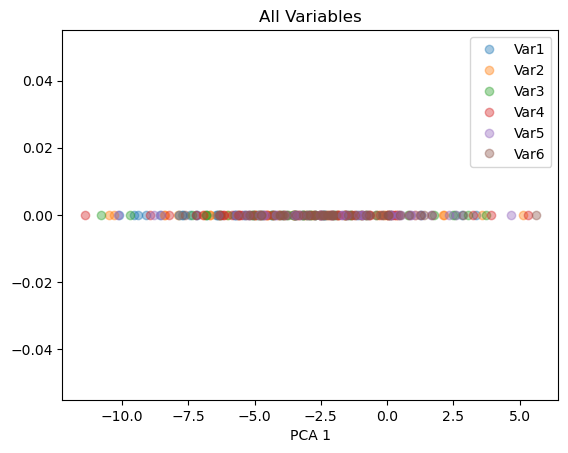

In [81]:
for key, group in df_1D.groupby(['Group']):
    plt.plot(group['projection'], np.zeros_like(group['projection']), alpha=0.4, 
             label=key, marker='o', linestyle='none')

plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(np.array(['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23','Var24','Var25','Var26','Var27','Var28'
]))
plt.title('All Variables');

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
#defining columns to use for PCA
df = dataset.iloc[:, 1:28]

In [84]:
#defining the scaler
scaler = StandardScaler()

In [85]:
#creating a copy of the Data
scaled_df=df.copy()

In [86]:
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns) #creating a scaled version of Data


In [87]:
#let us try to do a scree plot
#This is the URL where I found the Scree plot tutorial
#https://www.statology.org/scree-plot-python/
from sklearn.decomposition import PCA

In [88]:
#defining a PCA model to use
pca = PCA(n_components=27)

In [89]:
#fiting the PCA model to all of the data that we have collected
pca_fit = pca.fit(scaled_df)

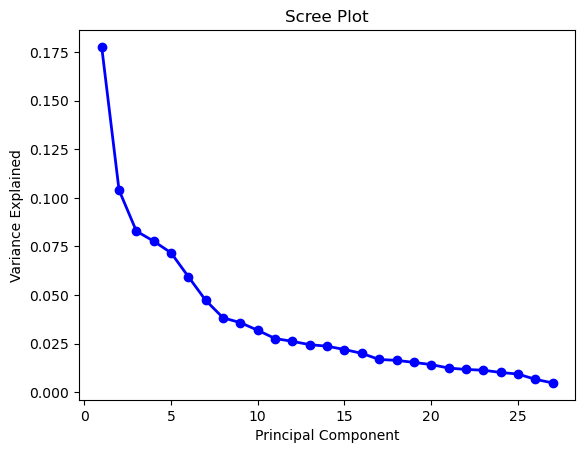

In [90]:
#This is going to create the scree lot
#This will calculate the total variance for each principal component
#Think of this like a descending linear graph *NOTE TO SELF*
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [91]:
#Now I have to see what the % of total variance by eacxh PC
#********NOTE******* THIS SHOULD ALL EQUAL TO ONE 
print(pca.explained_variance_ratio_)

[0.17761084 0.1039752  0.08287333 0.07770385 0.07171187 0.05940716
 0.04724103 0.03828821 0.03580647 0.03186681 0.02763872 0.02618727
 0.0244716  0.0237001  0.02198428 0.02001557 0.01686798 0.01642168
 0.01536734 0.01423821 0.01247367 0.01173091 0.01135514 0.01020572
 0.0093672  0.00668094 0.00480889]


In [92]:
#First PC is 17.76% of the variant in data set
#2 P is ~ 10.40% of the variant in data set
#etc etc etc etc up until the very end
#First 8 factors

In [93]:
#Now I am going to be doing a factor analysis... Wish me luck
#This is the tutprial I am using: https://www.datacamp.com/tutorial/introduction-factor-analysis
#https://pypi.org/project/factor-analyzer/
#NOTE TO SELF IN CMMD PROMPT pip install factor_analyzer

In [94]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [95]:
EFA = pd.read_csv('alldata.csv')

In [96]:
fa = FactorAnalyzer(rotation=None)

In [97]:
fa.fit(EFA)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [98]:
#Double check w/ sabine because I should have some bounds and a correlation matric happening here... 

In [99]:
#I am doing the Facor analyur loadings here... 
fa.loadings_

array([[ 7.52128113e-01,  1.24331684e-01,  2.41901346e-02],
       [ 7.44014672e-01,  1.37000594e-01,  4.56590948e-02],
       [ 6.38803501e-01,  2.38747582e-01,  9.09576475e-02],
       [-1.54381442e-01,  7.03631246e-01,  2.44374063e-01],
       [-1.93009168e-01,  7.69285349e-01,  2.22819509e-01],
       [-9.66965710e-02,  6.50520934e-01,  2.14038819e-01],
       [-5.62217446e-01,  4.35175262e-02, -2.40719663e-01],
       [-6.09467432e-01,  8.89328529e-02, -1.86892328e-01],
       [-4.13064768e-01,  9.51341936e-02, -1.13756456e-01],
       [ 5.26060057e-01,  1.55266841e-01,  1.69301689e-01],
       [ 4.91247915e-01,  7.94485500e-02,  1.79228344e-01],
       [ 5.53344726e-01,  4.44802833e-02,  2.20731156e-01],
       [ 6.25037547e-01,  3.87029147e-02,  1.88675092e-01],
       [-3.27697065e-01,  2.35210892e-01,  1.78098367e-01],
       [-3.15294700e-01,  2.72869542e-01,  1.74312659e-01],
       [-3.72658969e-01,  2.27318887e-01,  1.62858943e-01],
       [-3.31364146e-01,  2.59670405e-01

In [100]:
#I am getting the communialities here
fa.get_communalities()

array([5.81740229e-01, 5.74411748e-01, 4.73343615e-01, 5.78649242e-01,
       6.78701021e-01, 4.78340329e-01, 3.75928187e-01, 4.14288345e-01,
       1.92613549e-01, 3.29510038e-01, 2.79759386e-01, 3.56891125e-01,
       4.27768141e-01, 1.94428559e-01, 2.04253438e-01, 2.17071619e-01,
       1.95471447e-01, 1.11602995e-01, 7.35263566e-02, 1.41093529e-01,
       6.44058017e-01, 5.25065110e-01, 6.88563504e-01, 4.66820442e-02,
       6.72829655e-04, 3.67088492e-03, 1.16660100e-02, 1.58299675e-02,
       2.94941246e-02, 8.63716864e-02])

In [101]:
#I am not liking the communialities here as well because they are not within 0 and 1

In [102]:
out_sum = np.cumsum(pca.explained_variance_ratio_)

In [103]:
print (out_sum)

[0.17761084 0.28158604 0.36445937 0.44216322 0.51387509 0.57328225
 0.62052328 0.65881149 0.69461796 0.72648477 0.75412349 0.78031076
 0.80478236 0.82848247 0.85046675 0.87048232 0.8873503  0.90377198
 0.91913932 0.93337753 0.9458512  0.95758211 0.96893726 0.97914297
 0.98851017 0.99519111 1.        ]


In [104]:
print(pca.explained_variance_)

[4.8128677  2.81750182 2.24568721 2.10560529 1.94323576 1.60980498
 1.28012912 1.03752727 0.97027755 0.86352137 0.74894919 0.7096181
 0.66312712 0.64222132 0.59572632 0.54237831 0.45708564 0.44499184
 0.41642147 0.38582456 0.33800934 0.31788226 0.30769971 0.27655274
 0.25383072 0.18103897 0.1303104 ]


In [105]:
df = pd.read_csv('alldata.csv')
df.head(300)

Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  Var21  \
0       7     7     7     1     1     1     1     1     3      5  ...      4   
1       6     6     5     6     5     6     1     1     2      5  ...      3   
2       7     7     7     6     2     1     1     1     4      5  ...      5   
3       7     7     5     2     3     1     2     3     2      6  ...      5   
4       7     7     7     4     4     4     5     3     3      5  ...      3   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
272     7     7     7     7     7     6     1     1     3      7  ...      4   
273     6     6     6     5     6     2     3     6     6      5  ...      3   
274     6     6     6     1     1     1     3     1     1      5  ...      3   
275     5     5     5     1     1     1     1     1     1      5  ...      3   
276     6     6     7     4     4     4     3     3     3      5  ...      2   

     Var22  Var23  Var24  Var25  Var26  Var27  Var28  ChatbotFamilarity  Group  
0        4      2      7      7      7      7      5                  1      1  
1        2      5      7      5      5      7      6                  1      1  
2        5      5      7      5      7      7      6                  1      1  
3        7      5      7      6      6      5      6                  1      1  
4        6      6      5      6      4      6      6                  1      1  
..     ...    ...    ...    ...    ...    ...    ...                ...    ...  
272      4      4      5      5      5      6      5                  1      6  
273      3      3      5      5      6      5      5                  1      6  
274      4      3      6      5      4      6      2                  1      6  
275      6      3      5      7      5      5      3                  1      6  
276      2      2      5      6      6      6      4                  1      6  

[277 rows x 30 columns]

In [106]:
df.iloc[:,1:].describe()

Var2        Var3        Var4        Var5        Var6        Var7  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     6.241877    6.205776    4.180505    3.967509    3.512635    2.707581   
std      1.130593    1.124933    1.751785    1.782267    1.737487    1.361098   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      6.000000    6.000000    3.000000    3.000000    2.000000    1.000000   
50%      7.000000    7.000000    4.000000    4.000000    4.000000    3.000000   
75%      7.000000    7.000000    6.000000    5.000000    5.000000    3.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

            Var8        Var9       Var10       Var11  ...       Var21  \
count  277.00000  277.000000  277.000000  277.000000  ...  277.000000   
mean     2.98917    3.805054    5.241877    5.036101  ...    3.794224   
std      1.56382    1.762608    1.054312    1.284860  ...    1.727097   
min      1.00000    1.000000    1.000000    1.000000  ...    1.000000   
25%      2.00000    3.000000    5.000000    5.000000  ...    2.000000   
50%      3.00000    4.000000    5.000000    5.000000  ...    4.000000   
75%      3.00000    5.000000    6.000000    6.000000  ...    5.000000   
max      7.00000    7.000000    7.000000    7.000000  ...    7.000000   

            Var22       Var23       Var24       Var25       Var26       Var27  \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     3.935018    3.826715    5.624549    5.411552    5.043321    5.490975   
std      1.720329    1.740067    0.979783    1.016322    1.307005    1.078827   
min      1.000000    1.000000    2.000000    2.000000    1.000000    1.000000   
25%      3.000000    2.000000    5.000000    5.000000    4.000000    5.000000   
50%      4.000000    4.000000    5.000000    5.000000    5.000000    6.000000   
75%      5.000000    5.000000    7.000000    6.000000    6.000000    6.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

            Var28  ChatbotFamilarity       Group  
count  277.000000         277.000000  277.000000  
mean     4.732852           1.050542    3.483755  
std      1.534897           0.219456    1.716477  
min      1.000000           1.000000    1.000000  
25%      4.000000           1.000000    2.000000  
50%      5.000000           1.000000    3.000000  
75%      6.000000           1.000000    5.000000  
max      7.000000           2.000000    6.000000  

[8 rows x 29 columns]

C:\Users\me\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


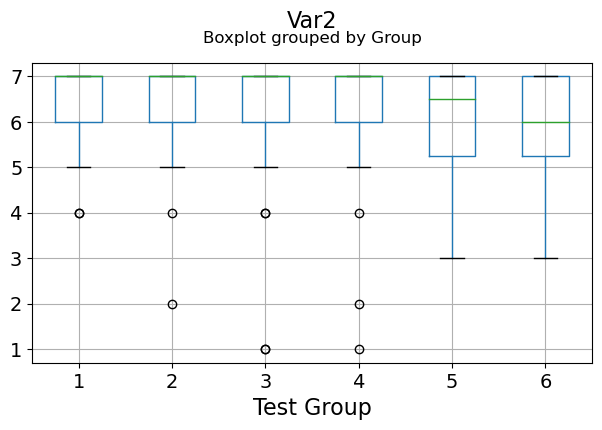

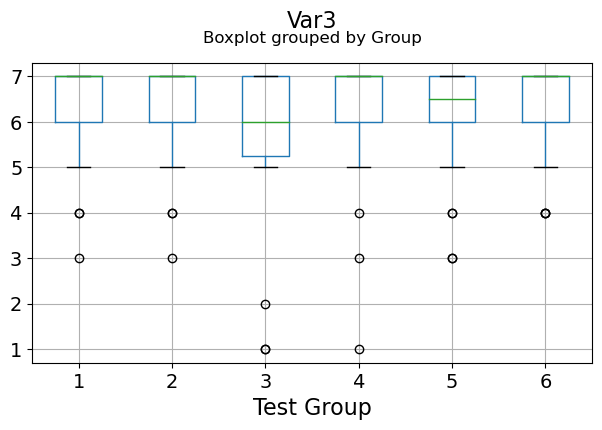

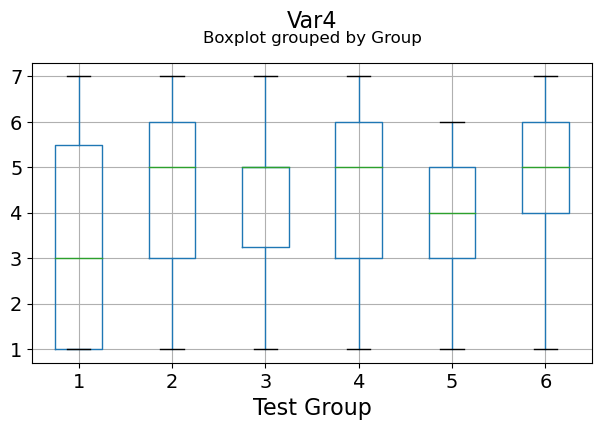

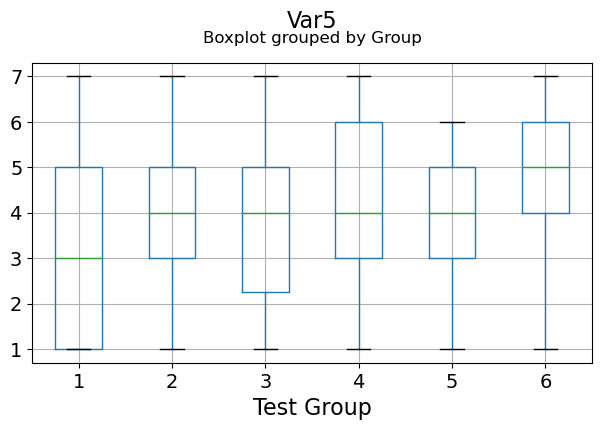

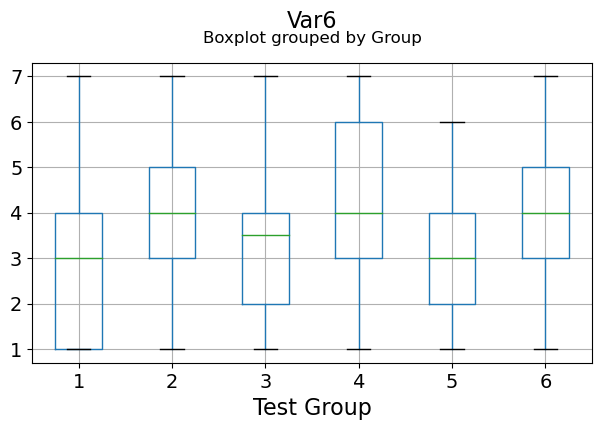

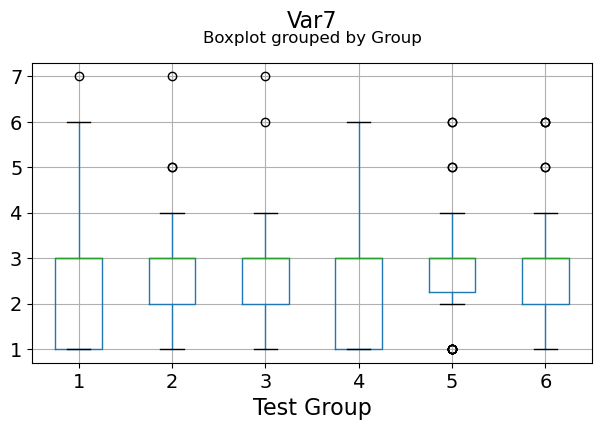

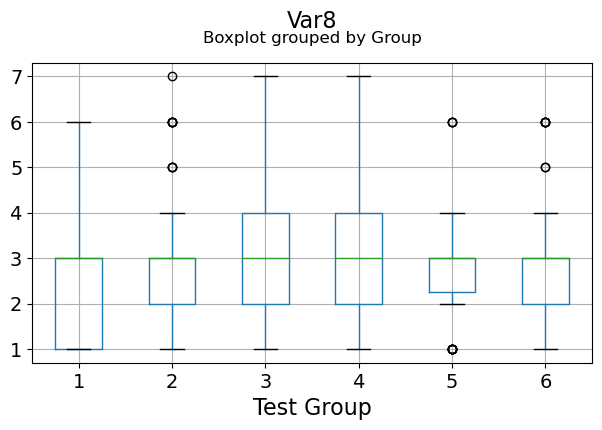

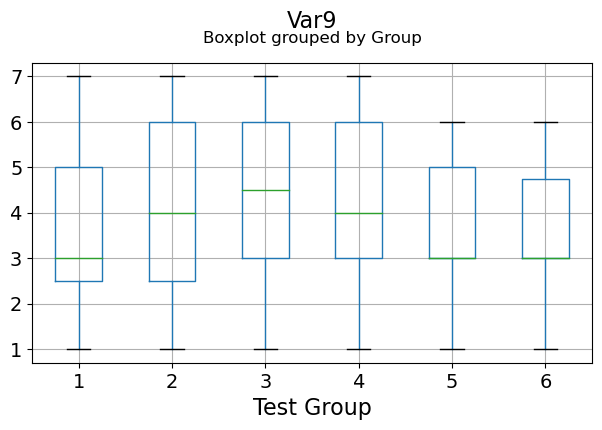

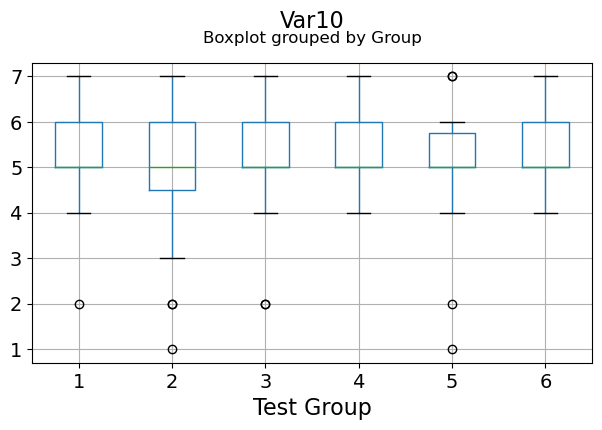

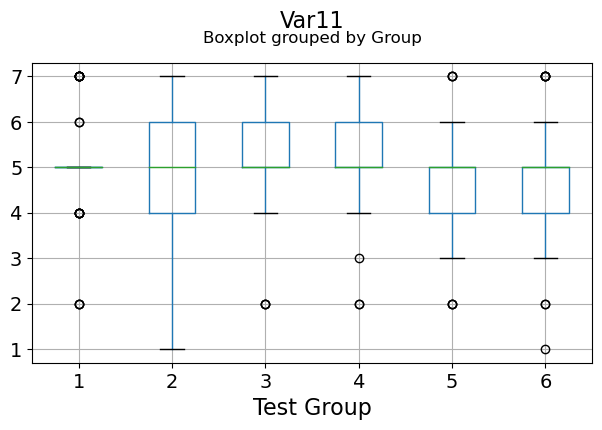

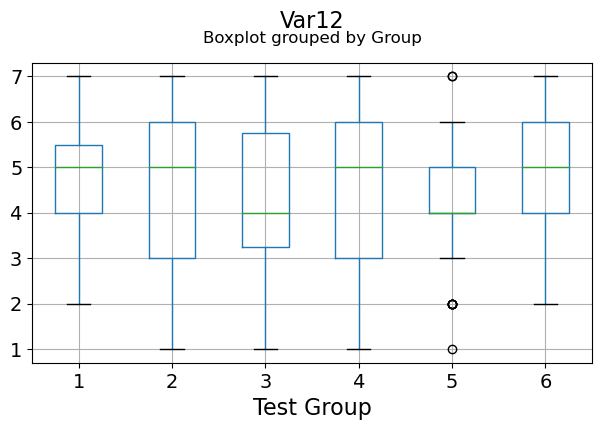

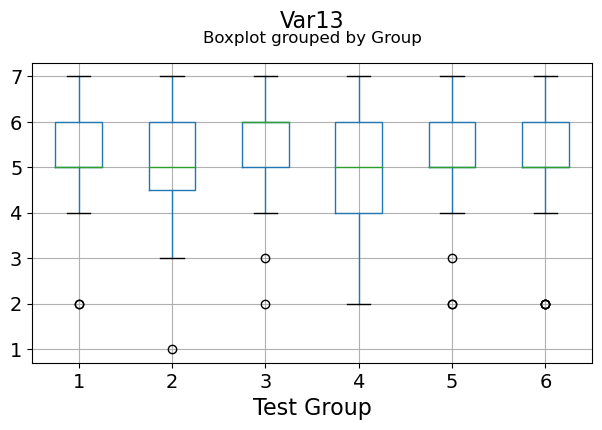

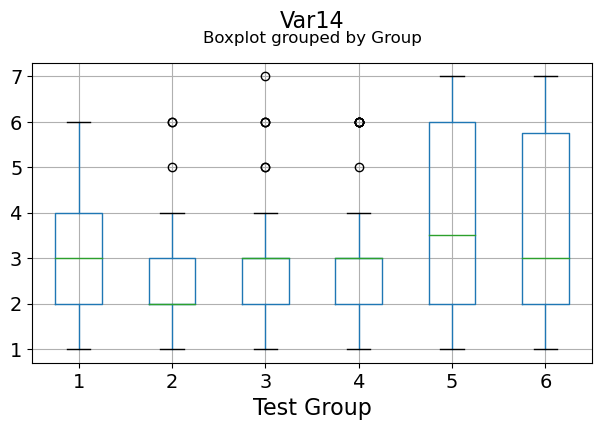

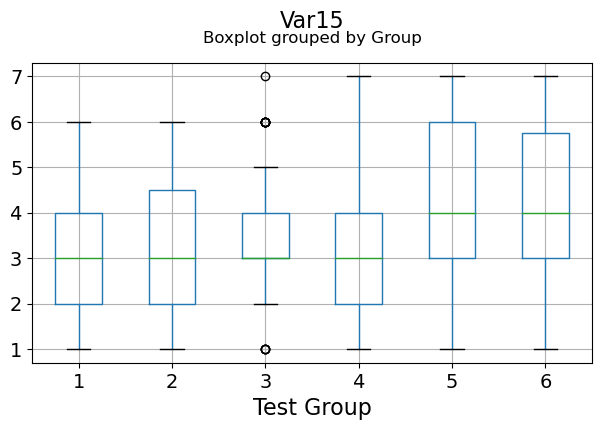

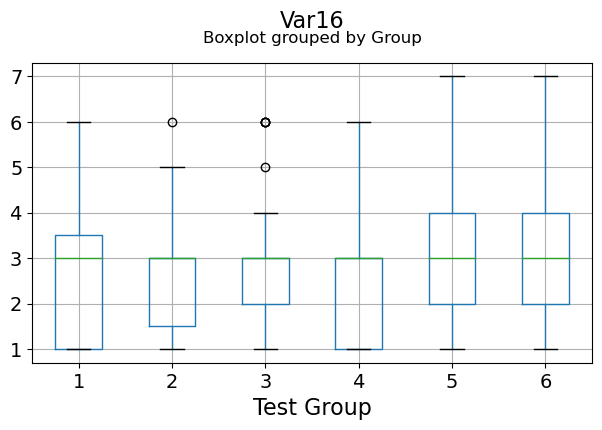

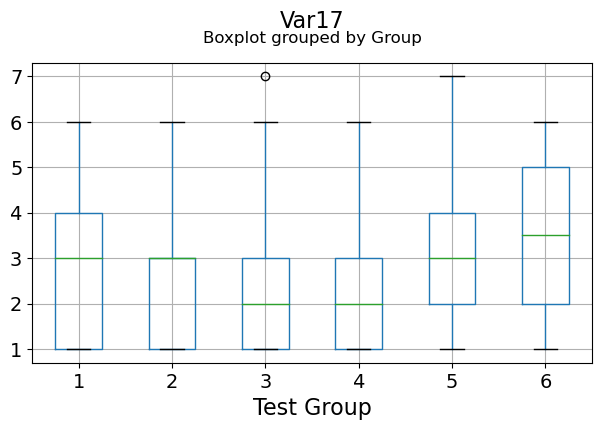

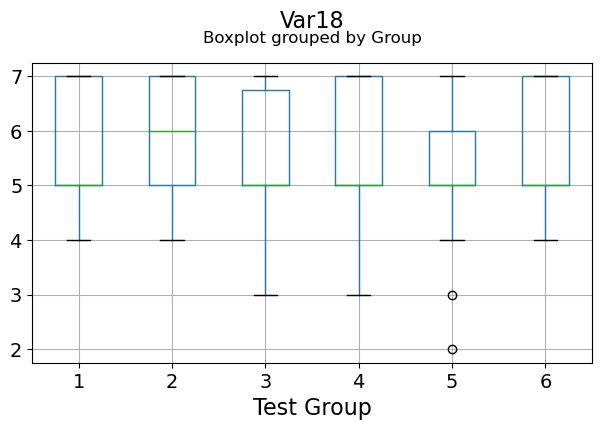

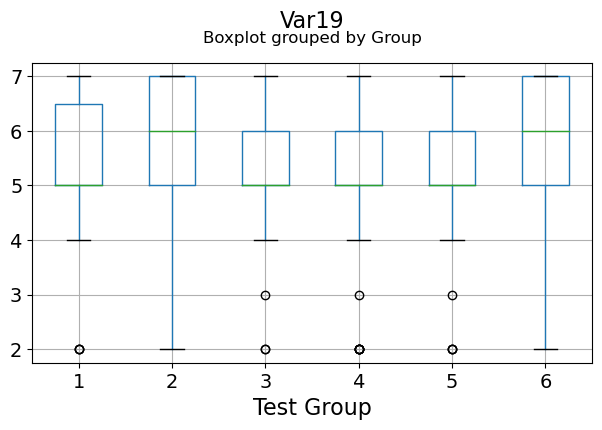

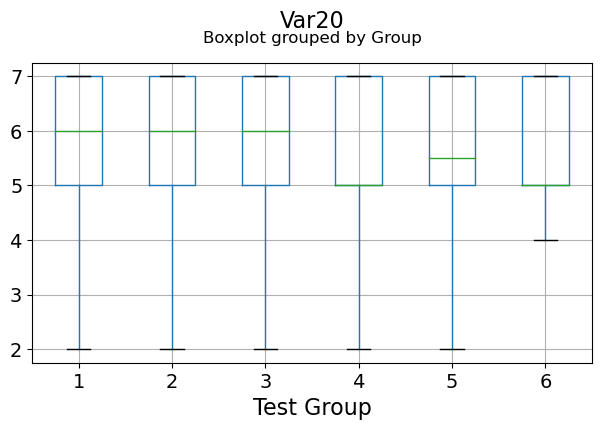

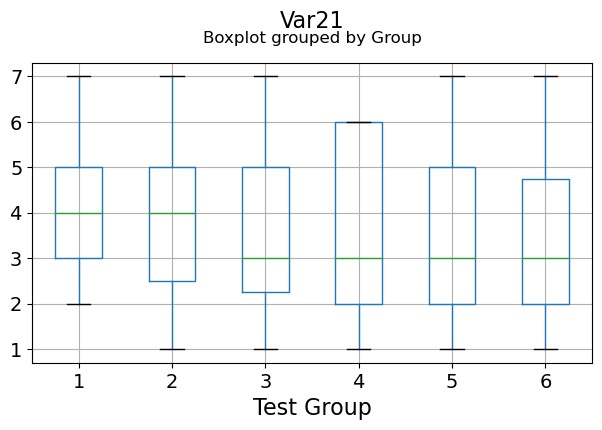

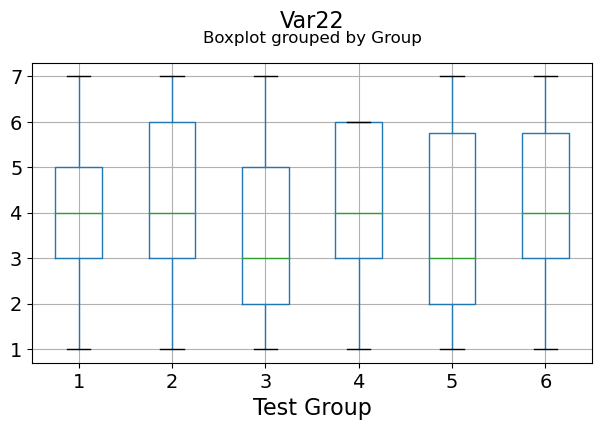

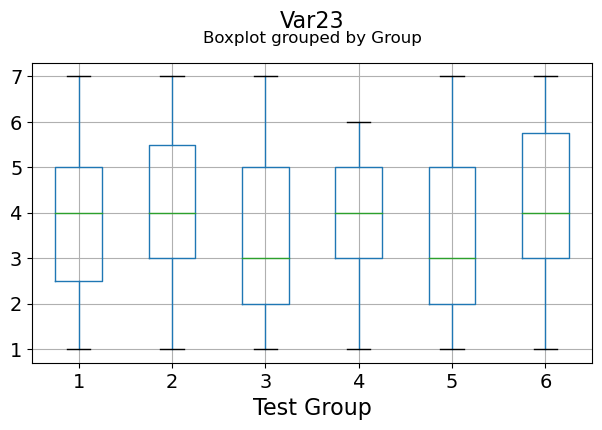

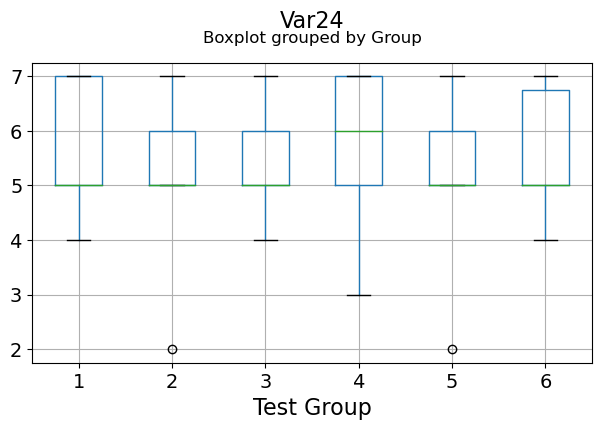

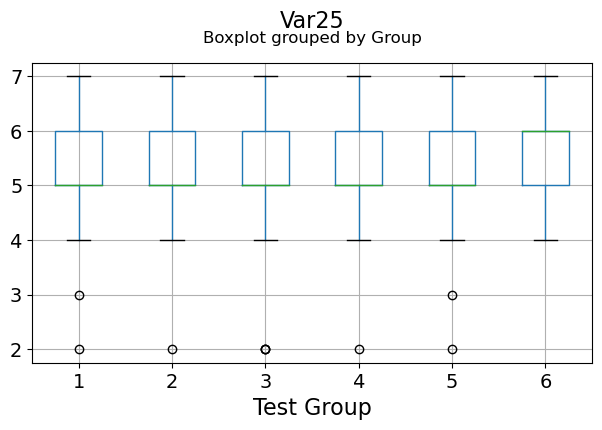

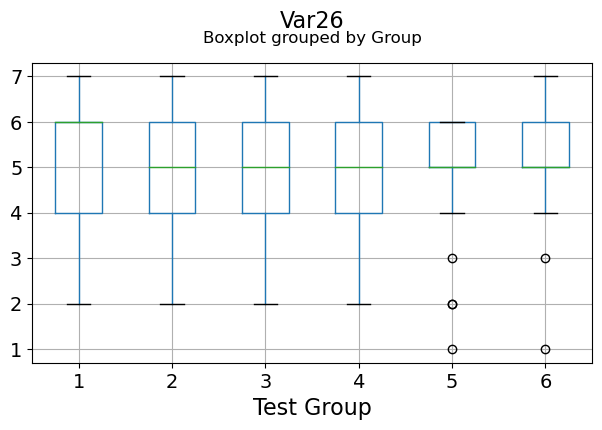

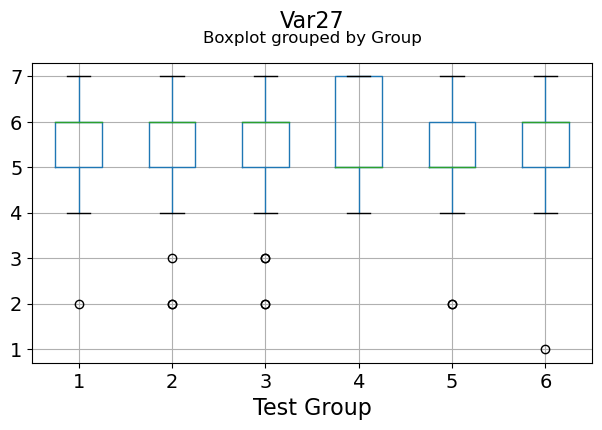

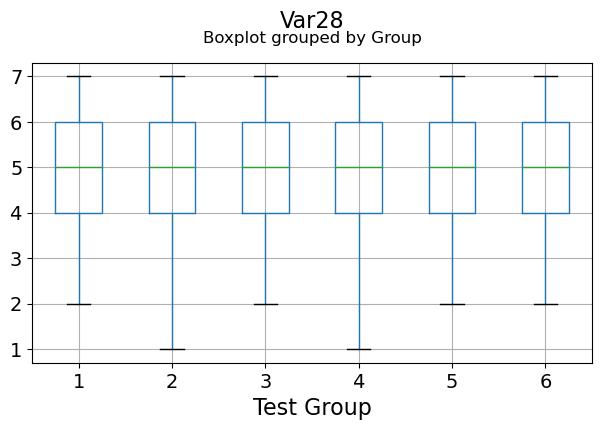

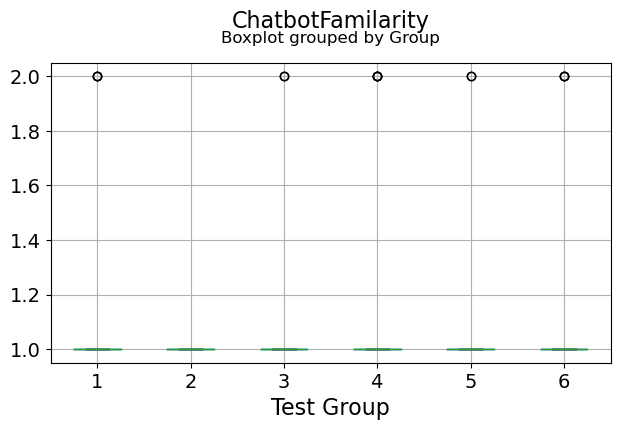

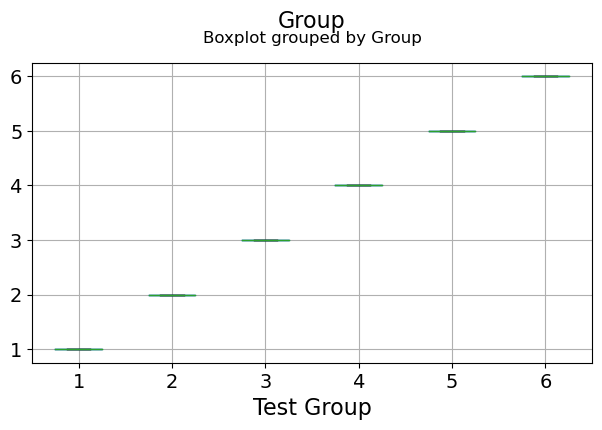

In [107]:
for c in df.columns[1:]:
    df.boxplot(c,by='Group',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Test Group", fontsize=16)

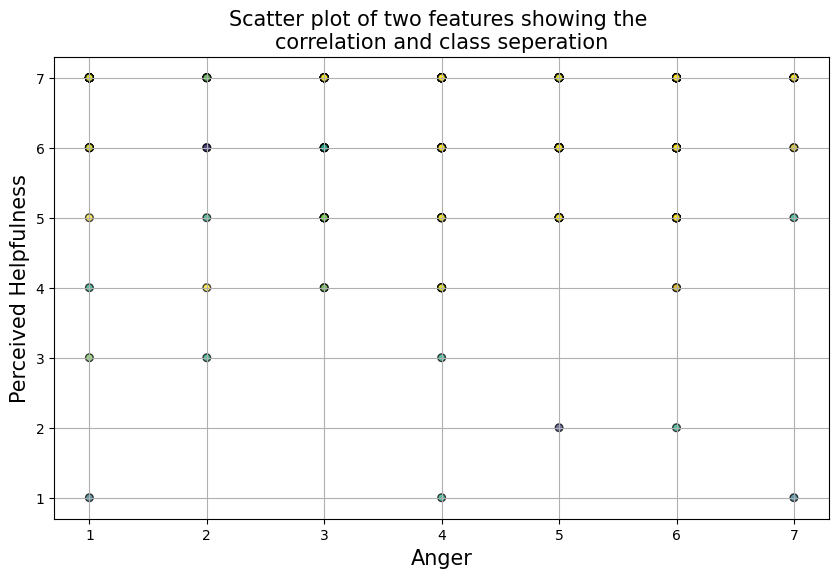

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(df['Var4'],df['Var1'],c=df['Group'],edgecolors='k',alpha=0.75,s=30)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Anger",fontsize=15)
plt.ylabel("Perceived Helpfulness",fontsize=15)
plt.show()

C:\Users\me\AppData\Local\Temp\ipykernel_25588\2668818856.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
C:\Users\me\AppData\Local\Temp\ipykernel_25588\2668818856.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


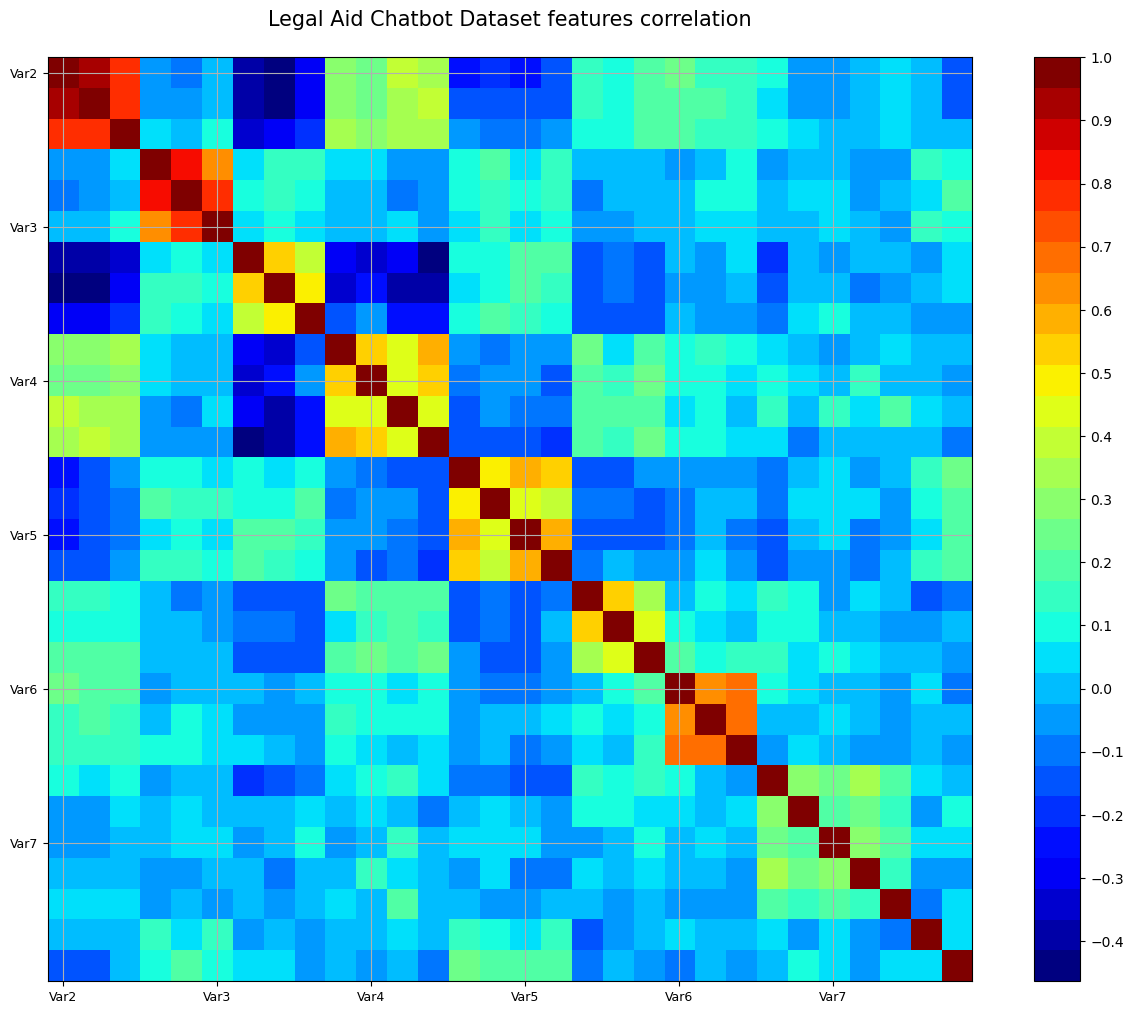

In [109]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Legal Aid Chatbot Dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X = df.drop('Group',axis=1)
y = df['Group']

In [113]:
X = scaler.fit_transform(X)

In [114]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [115]:
dfx.head(300)

Var2      Var3      Var4      Var5      Var6      Var7      Var8  \
0    0.716486  0.671767  0.707297 -1.818866 -1.668033 -1.448749 -1.256832   
1   -0.169526 -0.214326 -1.073805  1.040532  0.580362  1.434178 -1.256832   
2    0.716486  0.671767  0.707297  1.040532 -1.105934 -1.448749 -1.256832   
3    0.716486  0.671767 -1.073805 -1.246987 -0.543835 -1.448749 -0.520802   
4    0.716486  0.671767  0.707297 -0.103227  0.018263  0.281007  1.687291   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.716486  0.671767  0.707297  1.612412  1.704559  1.434178 -1.256832   
273 -0.169526 -0.214326 -0.183254  0.468652  1.142460 -0.872164  0.215229   
274 -0.169526 -0.214326 -0.183254 -1.818866 -1.668033 -1.448749  0.215229   
275 -1.055537 -1.100418 -1.073805 -1.818866 -1.668033 -1.448749 -1.256832   
276 -0.169526 -0.214326  0.707297 -0.103227  0.018263  0.281007  0.215229   

         Var9     Var10     Var11  ...     Var21     Var22     Var23  \
0   -1.274296 -0.457567 -0.229832  ...  0.308581  0.119361  0.037841   
1   -1.274296 -1.025935 -0.229832  ...  0.308581 -0.460693 -1.126831   
2   -1.274296  0.110801 -0.229832  ...  0.308581  0.699415  0.620178   
3    0.006938 -1.025935  0.720370  ...  0.308581  0.699415  1.784851   
4    0.006938 -0.457567 -0.229832  ... -0.529429 -0.460693  1.202514   
..        ...       ...       ...  ...       ...       ...       ...   
272 -1.274296 -0.457567  1.670573  ...  0.308581  0.119361  0.037841   
273  1.928789  1.247537 -0.229832  ...  0.308581 -0.460693 -0.544495   
274 -1.274296 -1.594303 -0.229832  ... -0.529429 -0.460693  0.037841   
275 -1.274296 -1.594303 -0.229832  ... -0.529429 -0.460693  1.202514   
276  0.006938 -0.457567 -0.229832  ... -0.529429 -1.040747 -1.126831   

        Var24     Var25     Var26     Var27     Var28  ChatbotFamilarity  \
0   -1.051696  1.406373  1.565767  1.499780  1.401297           0.174364   
1    0.675496  1.406373 -0.405676 -0.033205  1.401297           0.827053   
2    0.675496  1.406373 -0.405676  1.499780  1.401297           0.827053   
3    0.675496  1.406373  0.580045  0.733288 -0.455924           0.827053   
4    1.251227 -0.638589  0.580045 -0.799698  0.472686           0.827053   
..        ...       ...       ...       ...       ...                ...   
272  0.099766 -0.638589 -0.405676 -0.033205  0.472686           0.174364   
273 -0.475965 -0.638589 -0.405676  0.733288 -0.455924           0.174364   
274 -0.475965  0.383892 -0.405676 -0.799698  0.472686          -1.783701   
275 -0.475965 -0.638589  1.565767 -0.033205 -0.455924          -1.131013   
276 -1.051696 -0.638589  0.580045  0.733288  0.472686          -0.478324   

       Group  
0   -0.23072  
1   -0.23072  
2   -0.23072  
3   -0.23072  
4   -0.23072  
..       ...  
272 -0.23072  
273 -0.23072  
274 -0.23072  
275 -0.23072  
276 -0.23072  

[277 rows x 29 columns]

In [116]:
dfx.describe()

Var2          Var3          Var4          Var5          Var6  \
count  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02   
mean  -2.910828e-16 -4.358728e-17 -2.244494e-16  4.589189e-17 -4.039338e-17   
std    1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00   
min   -4.599581e+00 -4.644789e+00 -4.636009e+00 -1.818866e+00 -1.668033e+00   
25%   -1.695256e-01 -2.143257e-01 -1.832542e-01 -6.751070e-01 -5.438355e-01   
50%    7.164855e-01  6.717670e-01  7.072968e-01 -1.032274e-01  1.826313e-02   
75%    7.164855e-01  6.717670e-01  7.072968e-01  1.040532e+00  5.803617e-01   
max    7.164855e-01  6.717670e-01  7.072968e-01  1.612412e+00  1.704559e+00   

               Var7          Var8          Var9         Var10         Var11  \
count  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02   
mean  -6.312640e-17  1.173349e-16  1.285856e-16  2.527060e-16  9.098218e-17   
std    1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00   
min   -1.448749e+00 -1.256832e+00 -1.274296e+00 -1.594303e+00 -4.030644e+00   
25%   -8.721637e-01 -1.256832e+00 -6.336789e-01 -4.575671e-01 -2.298324e-01   
50%    2.810074e-01  2.152292e-01  6.938090e-03  1.108010e-01 -2.298324e-01   
75%    8.575929e-01  2.152292e-01  6.938090e-03  6.791691e-01  7.203703e-01   
max    2.010764e+00  3.159353e+00  2.569406e+00  1.815905e+00  1.670573e+00   

       ...         Var21         Var22         Var23         Var24  \
count  ...  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02   
mean   ... -7.054125e-17 -8.737495e-17 -4.809630e-18 -1.963932e-16   
std    ...  1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00   
min    ... -3.043458e+00 -1.620801e+00 -1.709168e+00 -1.627426e+00   
25%    ... -5.294287e-01 -1.040747e+00 -5.444951e-01 -1.051696e+00   
50%    ...  3.085813e-01  1.193613e-01  3.784136e-02  9.976558e-02   
75%    ...  1.146591e+00  6.994155e-01  6.201778e-01  6.754961e-01   
max    ...  1.146591e+00  1.859524e+00  1.784851e+00  1.826957e+00   

              Var25         Var26         Var27         Var28  \
count  2.770000e+02  2.770000e+02  2.770000e+02  2.770000e+02   
mean  -2.004013e-17  2.545096e-16  9.579181e-17  1.034071e-16   
std    1.001810e+00  1.001810e+00  1.001810e+00  1.001810e+00   
min   -3.706034e+00 -3.362840e+00 -3.099177e+00 -4.170366e+00   
25%   -6.385895e-01 -4.056760e-01 -7.996985e-01 -4.559243e-01   
50%   -6.385895e-01 -4.056760e-01 -3.320547e-02  4.726862e-01   
75%    1.406373e+00  5.800455e-01  7.332875e-01  4.726862e-01   
max    1.406373e+00  1.565767e+00  1.499780e+00  1.401297e+00   

       ChatbotFamilarity         Group  
count       2.770000e+02  2.770000e+02  
mean        1.533070e-16 -1.096195e-16  
std         1.001810e+00  1.001810e+00  
min        -2.436390e+00 -2.307205e-01  
25%        -4.783241e-01 -2.307205e-01  
50%         1.743645e-01 -2.307205e-01  
75%         8.270531e-01 -2.307205e-01  
max         1.479742e+00  4.334249e+00  

[8 rows x 29 columns]

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=None)

In [119]:
dfx_pca = pca.fit(dfx)

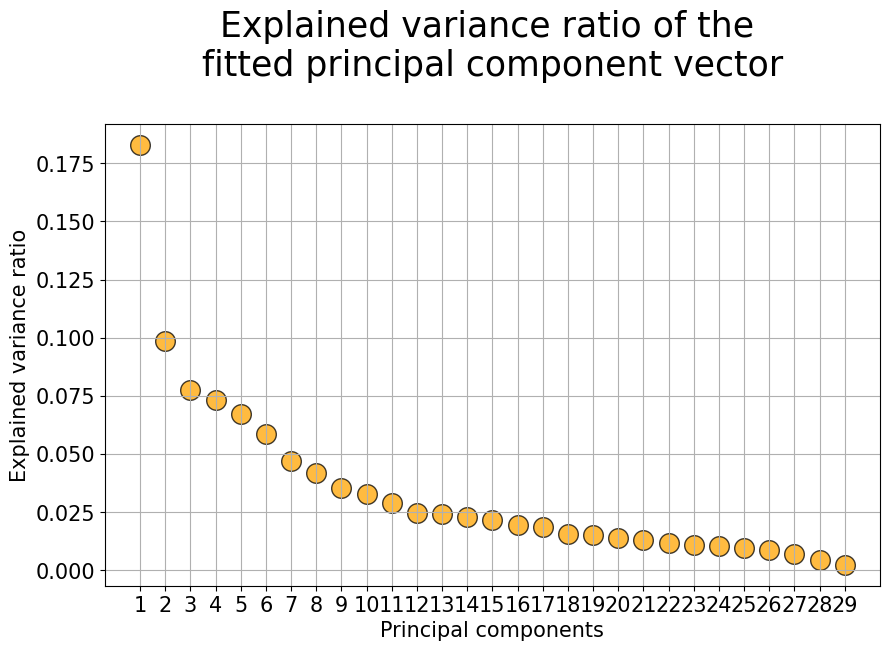

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [121]:
dfx_trans = pca.transform(dfx)

In [122]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(277)

0         1         2         3         4         5         6   \
0   -3.502348  3.303061  0.042878  1.140050 -1.369891  1.703541 -0.923787   
1   -1.077763 -0.119148  0.658458  2.111993  0.696258  0.701606 -0.691032   
2   -3.142106  1.073316 -1.124469  1.122903 -1.023396  0.623283 -0.006182   
3   -1.950396  1.489859 -2.006604 -0.225319 -1.142695  0.319654  0.243616   
4   -1.182475  0.196018 -2.049254  0.309883  0.661072  0.486516  0.364903   
..        ...       ...       ...       ...       ...       ...       ...   
272 -1.607636 -2.331299  0.774261  0.763213  1.471682  0.647978 -0.438551   
273  3.164164 -1.490953  1.491856 -0.924851 -1.025121 -0.227297  0.484175   
274 -0.177128  1.883073  1.650844 -2.330291 -1.330949 -0.433220 -0.083280   
275  1.316157  1.195236  2.018934 -3.036771 -2.663451 -0.588097  0.008391   
276  0.064677  0.061595  2.196987  0.714486 -0.246432 -0.129171  0.000759   

           7         8         9   ...        19        20        21  \
0    0.570262  1.066448 -0.275508  ... -0.125348  0.363750 -0.058058   
1    1.739570 -1.644041 -0.195520  ...  0.514977  0.619983  1.089456   
2    0.407269 -0.239331  0.060474  ... -0.251954 -0.470875  1.526258   
3    0.848480 -1.172266  0.694225  ... -1.742876  0.769662 -0.894213   
4   -1.251470 -0.481285 -0.174124  ...  1.039006  0.112218  0.334137   
..        ...       ...       ...  ...       ...       ...       ...   
272 -0.141277 -0.978399 -1.024573  ...  0.499869 -0.132646 -0.708608   
273 -1.328037  0.571745  0.653195  ... -0.639915 -0.534756 -0.012110   
274  0.901219 -0.016995 -1.777836  ...  1.513983 -0.253214 -0.584344   
275  1.999436 -1.029267 -1.503215  ...  0.266644  0.297808 -0.226245   
276 -0.202250  0.709970 -0.373929  ...  0.245842 -0.160626  0.623747   

           22        23        24        25        26        27        28  
0   -0.658628 -0.165188 -0.692181 -0.309062 -0.181036 -0.024039  0.026273  
1    0.474014  1.085888  0.193273  0.873084  0.034985  0.586253  0.008040  
2   -0.609744  0.503667  0.259333 -0.537143 -0.612126  0.846886 -0.095103  
3   -0.419663  0.189013 -0.188486 -0.196661  1.240889  0.047979 -0.048116  
4   -1.288897  0.163747  0.120394  0.356342  0.067934 -0.030480 -0.098364  
..        ...       ...       ...       ...       ...       ...       ...  
272  1.186818  0.600344  0.387219 -0.474064 -0.711635 -0.307697 -0.136366  
273  0.332849  0.118461  0.481005 -0.368544  0.755233 -0.529772 -0.306165  
274 -0.240871  0.971312  0.439631 -0.497962 -0.911338 -0.314775 -0.144471  
275 -0.730579 -0.605901  0.121469 -0.148549  0.203104  0.411323 -0.196679  
276 -0.532778 -1.188570  0.146764  0.159460  0.245720  0.015390  0.023840  

[277 rows x 29 columns]

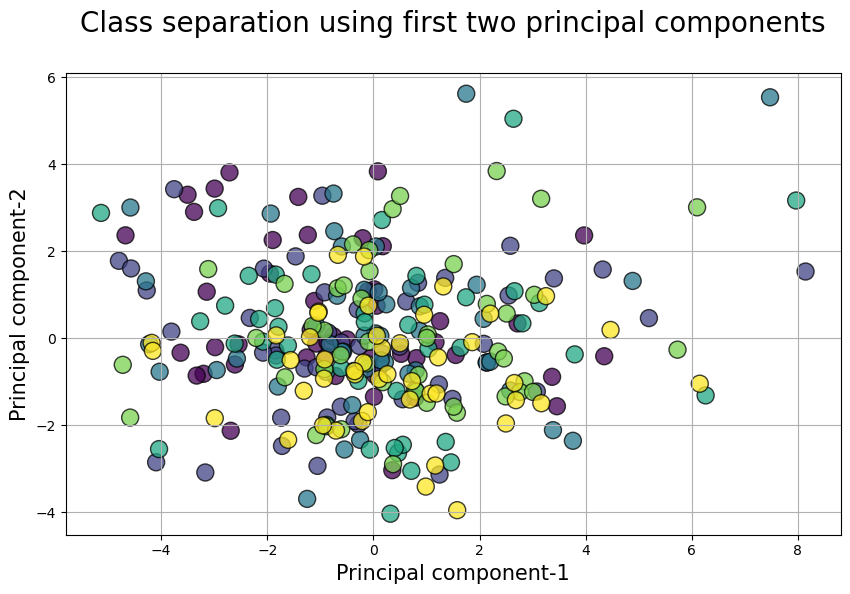

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Group'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()